<a href="https://colab.research.google.com/github/Nelson-iitp/2121CS07_CS575/blob/main/Assignment_1/%5BSOLUTION%5D_CS575_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#Basic Descriptive Stats

##[1] Load Numpy, Pandas and other Libraries

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import math
import scipy.stats as st

#snippet
dt_start = dt.datetime.now()
dt_end = dt.datetime.now()
print('Elapsed Time:', dt_end - dt_start)

Elapsed Time: 0:00:00.000034


## [2] Load Dataset "Inc_Exp_Data.csv" using Pandas

In [3]:
DATA_SET_LOCATION = "https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_1/Inc_Exp_Data.csv"
df = pd.read_csv(DATA_SET_LOCATION, sep=",")

## [3] Analyze the data using pandas info() *function*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


## [4] Analyze the data using pandas describe() *function*

In [5]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


## [5] Analyze the data using pandas shape object

In [6]:
df.shape

(50, 7)

##[6] Check for missing values

In [7]:
print('Missing Values in Dataset')
print("\t#NULLS =",len(np.where(df.isnull()==True)[0]))
print("\t#N/A =",len(np.where(df.isna()==True)[0]))
print('')
for k in df.keys():
  print('Invalid Values in COLUMN:',k,'\t',len(df[k])-df[k].count())
  print('')

Missing Values in Dataset
	#NULLS = 0
	#N/A = 0

Invalid Values in COLUMN: Mthly_HH_Income 	 0

Invalid Values in COLUMN: Mthly_HH_Expense 	 0

Invalid Values in COLUMN: No_of_Fly_Members 	 0

Invalid Values in COLUMN: Emi_or_Rent_Amt 	 0

Invalid Values in COLUMN: Annual_HH_Income 	 0

Invalid Values in COLUMN: Highest_Qualified_Member 	 0

Invalid Values in COLUMN: No_of_Earning_Members 	 0



In [8]:
df.isnull()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


##[7] What is the Mean Expense of a Household? Compute mean using Inbuilt pandas function and write your own function for the same.

In [9]:
# manual array summing 
def npsum(Arr):
  sum=0
  for x in Arr:
    sum+=x
  return sum

# custom function for mean
def custom_mean(Arr):
    return npsum(Arr)/len(Arr)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

key = 'Mthly_HH_Expense'
cmean, pmean = custom_mean(df[key]), df[key].mean()
print(key)
print('Custom Mean:',cmean)
print('Pandas Mean:',pmean)
print('Error:',pmean-cmean)

Mthly_HH_Expense
Custom Mean: 18818.0
Pandas Mean: 18818.0
Error: 0.0


##[8] What is the Median Household Expense? Compute Median using Inbuilt pandas function and write your own function for the same.

In [10]:
# need to sort array for median,
# define sorting function
def npsort(Arr):
  # use mergesort 
  # base cases
  res = None
  if len(Arr)==0:
    res = Arr  # return back input array if its len is 0 - this case is impossible 
  elif len(Arr)==1:
    res = np.zeros(1)+Arr[0]  # return a copy of array
  else:
    # len>=2
    mid = int(len(Arr)/2) # 2nd arry will be larger if odd
    Arr1, Arr2 = Arr[0:mid], Arr[mid:]
    res = npjoin(npsort(Arr1),npsort(Arr2)) # split
  return res

def npjoin(Arr1, Arr2):
  # sure that each array is at least len1
  N1,N2 = len(Arr1), len(Arr2)
  N=N1+N2
  resF = np.zeros(N)
  i, i1, i2 = 0, 0, 0
  while(i<N):
    try:
      if Arr1[i1]>Arr2[i2]:
        resF[i]=Arr2[i2]
        i2+=1
      else:
        resF[i]=Arr1[i1]
        i1+=1
      i+=1
    except:
      #one of the arry is finished
      # copy rest as it is and break loop
      while(i1<N1):
        resF[i]=Arr1[i1]
        i1+=1
        i+=1
      while(i2<N2):
        resF[i]=Arr2[i2]
        i2+=1
        i+=1
      break
  return resF

def custom_median(Arr1):
  Arr = npsort(np.array(Arr1))
  if len(Arr)%2 == 0:
    # even elements - return avg of 2 middle values
    return (Arr[int(len(Arr)/2)] + Arr[int(len(Arr)/2)-1])/2
  else:
    # odd elements - return 2 middle value
    return (Arr[int(len(Arr)/2)])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

key = 'Mthly_HH_Expense'
cmed, pmed = custom_median(df[key]), df[key].median()
print(key)
print('Custom Median:',cmed)
print('Pandas Median:',pmed)
print('Error:',pmed-cmed)

Mthly_HH_Expense
Custom Median: 15500.0
Pandas Median: 15500.0
Error: 0.0


##[9] What is the Monthly Expense for most of the Households?


In [11]:
key='Mthly_HH_Expense'
print(key,'\nMode:',np.array(df[key].mode()))

Mthly_HH_Expense 
Mode: [25000]


##[10] Calculate IQR(difference between 75% and 25% quartile)

In [12]:
# for all coulmns
print('COLOUMN_NAME','\t\t','IQR')
for k in df.keys():
  try:
    print(k,'\t', df[k].quantile(0.75) - df[k].quantile(0.25) )
  except:
    print(k,'\t' "<none>")


COLOUMN_NAME 		 IQR
Mthly_HH_Income 	 26825.0
Mthly_HH_Expense 	 15000.0
No_of_Fly_Members 	 2.0
Emi_or_Rent_Amt 	 3500.0
Annual_HH_Income 	 335970.0
Highest_Qualified_Member 	<none>
No_of_Earning_Members 	 1.0


##[11] Calculate Standard Deviation for first 4 columns. Compute Standard Deviation using Inbuilt pandas function and write your own function for the same.

In [13]:
def custom_std(Data):
    mean = custom_mean(Data)
    sum_of_sq = npsum(Data**2)
    std_pol = ((sum_of_sq/len(Data)) - mean**2)**0.5
    std_sample = ((sum_of_sq/(len(Data)-1)) - ((mean**2) * (len(Data)/(len(Data)-1))))**0.5
    # returns tuple (population_variance, sample_variance)
    return  std_sample, std_pol

print('# Coloumn_name \t\t Pandas StdDev \t\t Sample StdDev \t\t Error \t\t Population StdDev',)
for i in range(0, 4):
  key = df.keys()[i]
  pdv=df[key].std()
  sv,pv = custom_std(df[key])
  print(i,key,'\t',pdv,'\t',sv,'\t',abs(round(pdv-sv,8)),'\t\t',pv )

# Coloumn_name 		 Pandas StdDev 		 Sample StdDev 		 Error 		 Population StdDev
0 Mthly_HH_Income 	 26097.908978713687 	 26097.908978713687 	 0.0 		 25835.611779092826
1 Mthly_HH_Expense 	 12090.216824240286 	 12090.216824240286 	 0.0 		 11968.704023410388
2 No_of_Fly_Members 	 1.5173822786601394 	 1.5173822786601405 	 0.0 		 1.502131818450033
3 Emi_or_Rent_Amt 	 6241.434947516607 	 6241.434947516607 	 0.0 		 6178.705366013175


##[12] Calculate Variance for first 3 columns. Compute Variance using Inbuilt pandas 
function and write your own function for the same.

In [14]:
def custom_var(Data):
    mean = custom_mean(Data)
    sum_of_sq = npsum(Data**2)
    var_pol = (sum_of_sq/len(Data)) - mean**2
    var_sample = (sum_of_sq/(len(Data)-1)) - ((mean**2) * (len(Data)/(len(Data)-1)))
    # returns tuple (population_variance, sample_variance)
    return  var_sample,var_pol

print('# Coloumn_name \t\t Pandas Var \t\t Sample Var \t\t Error \t Population Var',)
for i in range(0, 3):
  key = df.keys()[i]
  pdv = df[key].var()
  sv,pv = custom_var(df[key])
  print(i,key,'\t',pdv,'\t',sv,'\t',abs(round(pdv-sv,8)),'\t',pv )


# Coloumn_name 		 Pandas Var 		 Sample Var 		 Error 	 Population Var
0 Mthly_HH_Income 	 681100853.0612245 	 681100853.0612245 	 0.0 	 667478836.0
1 Mthly_HH_Expense 	 146173342.85714287 	 146173342.85714287 	 0.0 	 143249876.0
2 No_of_Fly_Members 	 2.302448979591837 	 2.3024489795918406 	 0.0 	 2.256400000000003


##[13] Calculate Skewness for first 3 columns. Compute Skewness using Inbuilt pandas function and write your own function for the same.


##[14] Calculate Kurtosis for first 3 columns. Compute Kurtosis using Inbuilt pandas function and write your own function for the same.

In [15]:
# define kth central moment (required for both skewness and kurtosis)
def kth_central_moment(Data, k):
  return  custom_mean((Data - custom_mean(Data))**k)

# define custom skew function
def custom_skew(Data, correct_bias):
  mu3,mu2,N = kth_central_moment(Data,3), kth_central_moment(Data,2), len(Data)
  cskew =  mu3/mu2**1.5
  if correct_bias:
    cskew *= ((N*(N-1))**0.5)/(N-2)
  return cskew

# define custom kurtosis function
def custom_kurtosis(Data, correct_bias):
  mu4,mu2,N = kth_central_moment(Data,4), kth_central_moment(Data,2),len(Data)
  ckurt =  (mu4/mu2**2) -3
  if correct_bias:
    ckurt = (  (N-1)/((N-2)*(N-3))  ) * ( (N+1)*ckurt + 6) 
  return ckurt

print('# Coloumn_name \t\t Pandas Skew \t\t Custom Skew \t\t Error')
for i in range(0, 3):
  key = df.keys()[i] 
  pds,csk = df[key].skew(),custom_skew(df[key], True)
  print(i,key,'\t',pds,'\t',csk,'\t',abs(round(pds-csk,8)) )
print('\n')
print('# Coloumn_name \t\t Pandas Kurtosis \t Custom Kurtosis \t Error')
for i in range(0, 3):
  key = df.keys()[i] 
  pdk,ckk = df[key].kurtosis(),custom_kurtosis(df[key], True)
  print(i,key,'\t',pdk,'\t',ckk,'\t',abs(round(pdk-ckk,8)) )

# Coloumn_name 		 Pandas Skew 		 Custom Skew 		 Error
0 Mthly_HH_Income 	 0.9246148763777229 	 0.9246148763777229 	 0.0
1 Mthly_HH_Expense 	 1.1994608030097127 	 1.1994608030097127 	 0.0
2 No_of_Fly_Members 	 0.11367415455857431 	 0.11367415455857423 	 0.0


# Coloumn_name 		 Pandas Kurtosis 	 Custom Kurtosis 	 Error
0 Mthly_HH_Income 	 0.11555007146606489 	 0.11555007146606527 	 0.0
1 Mthly_HH_Expense 	 0.9424897886350738 	 0.9424897886350726 	 0.0
2 No_of_Fly_Members 	 -0.8514445579758396 	 -0.8514445579758408 	 0.0


##[15] Find the correlation coeeficient between the "Mthly_HH_Income" and	"Mthly_HH_Expense". Compute correlation coeeficient using Inbuilt pandas function and write your own function for the same.


In [16]:
def custom_corr(Arr1, Arr2):
  if len(Arr1) != len(Arr2):
    return None
    # the corr-coefficients to be returned
  corr = 0
  x,y = Arr1, Arr2
  mean_x, mean_y = custom_mean(x), custom_mean(y)

  numerator = npsum( (x - mean_x ) * ( y - mean_y) )
  dinominator =  (npsum((x - mean_x )**2) * npsum((y - mean_y )**2))**0.5
  
  corr = numerator / dinominator
  return corr

key1, key2 = 'Mthly_HH_Income', 'Mthly_HH_Expense'
print('Corr(',key1,',',key2,')')
pcor,ccor = df.corr()[key1][key2], custom_corr(df[key1], df[key2])
print('Pandas Corr:',pcor)
print('Custom Corr:',ccor)
print('Error:',pcor-ccor)

Corr( Mthly_HH_Income , Mthly_HH_Expense )
Pandas Corr: 0.6492152549316461
Custom Corr: 0.6492152549316461
Error: 0.0


##[16] Calculate the total counts under each qualification

In [17]:
key='Highest_Qualified_Member'
print(key)
count_col = df[key]
quals = np.unique(count_col)
icnt = 0
for k in quals:
  ccnt = len(np.where(count_col==k)[0])
  icnt +=ccnt
  print(k,'\t\t',ccnt )
print('_______________')
print('Total Count\t\t',icnt )

Highest_Qualified_Member
Graduate 		 19
Illiterate 		 5
Post-Graduate 		 6
Professional 		 10
Under-Graduate 		 10
_______________
Total Count		 50


##[17] Compute logarithmic mean of the first two cols using your own function

In [18]:
def custom_log_mean(ArrL):
  # mean of min and max
  A,B = np.amin(ArrL), np.amax(ArrL)
  if A<=0 or B<=0:
    return None # arithmatic error
  if A==B:
    return A
  else:
    return (B-A)/(math.log(B/A))

#print(custom_log_mean(dx))
#print(log3mean(dx))
print('# Coloumn_name \t\t Custom Log_Mean')
for i in range(0, 2):
 key = df.keys()[i] 
 print(i,key,'\t', custom_log_mean(np.sort(df[key])))
print('\n')

# Coloumn_name 		 Custom Log_Mean
0 Mthly_HH_Income 	 31711.779066056737
1 Mthly_HH_Expense 	 14912.038429430684




##[18] Compute geometric mean of the first two cols using your own  function and verify using inbuilt Python function

In [19]:
# element wise product of array
def npprod(Arr):
  mul=1
  for x in Arr:
    mul*=x
  return mul

def custom_gmean(Arr):
  return npprod(Arr**(1/len(Arr)))

print('# Coloumn_name \t\t Scipy Gmean \t\t Custom Gmean \t\t Error')
for i in range(0, 2):
 key = df.keys()[i] 
 stgm,cgm=st.gmean(df[key]),custom_gmean(df[key])
 print(i,key,'\t', stgm,'\t',cgm,'\t',abs(round(stgm-cgm,8)))

# Coloumn_name 		 Scipy Gmean 		 Custom Gmean 		 Error
0 Mthly_HH_Income 	 33590.37754021395 	 33590.37754021399 	 0.0
1 Mthly_HH_Expense 	 15391.89958222314 	 15391.89958222314 	 0.0


##[19] Compute *Mean Deviation from the Mean* of the first two cols using your own  function and verify using inbuilt Python function

In [20]:
# "Mean Deviation from mean" is always zero - there is no inbuilt python function for it
def custom_mdm(Arr):
  return custom_mean(Arr - custom_mean(Arr))

print('# Coloumn_name \t\t MDM')
for i in range(0, 2):
 key = df.keys()[i] 
 print(i,key,'\t', custom_mdm(df[key]))

# Coloumn_name 		 MDM
0 Mthly_HH_Income 	 0.0
1 Mthly_HH_Expense 	 0.0


##[20] Compute *Mean Absolute Deviation from the Mean* of the first two cols using your own function and verify using inbuilt Python function

In [21]:
def npsumabs(Arr):
  sum=0
  for i in Arr:
    sum+=abs(i)
  return sum

def custom_mad(Arr): 
  res = Arr - custom_mean(Arr)
  return npsumabs(res)/len(res)

print('# Coloumn_name \t\t Custom MAD \t Pandas MAD \t Error')
for i in range(0, 2):
 key = df.keys()[i] 
 cmad, pmad = custom_mad(df[key]),df[key].mad()
 print(i,key,'\t',cmad ,'\t',pmad, '\t', abs(round(pmad-cmad,8)))

# Coloumn_name 		 Custom MAD 	 Pandas MAD 	 Error
0 Mthly_HH_Income 	 20288.96 	 20288.96 	 0.0
1 Mthly_HH_Expense 	 9247.44 	 9247.44 	 0.0


##[21] Compute *Coefficient of Variation* of the first two cols using your own function and verify using inbuilt Python function

In [22]:
#Coff of var = std dev / mean

# use already created custom_std function for standard dev
def custom_CoV(Arr):
  std_sam, std_pop = custom_std(Arr)
  return std_pop/custom_mean(Arr)

print('# Coloumn_name \t\t Scipy CoV \t\t Custom CoV \t\t Error')
for i in range(0, 2):
 key = df.keys()[i] 
 stcov, ccov = st.variation(df[key]),custom_CoV(df[key])
 print(i,key,'\t',stcov ,'\t',ccov,'\t',abs(round(stcov-ccov,8)))

# Coloumn_name 		 Scipy CoV 		 Custom CoV 		 Error
0 Mthly_HH_Income 	 0.6216760137420672 	 0.6216760137420672 	 0.0
1 Mthly_HH_Expense 	 0.636024233362227 	 0.636024233362227 	 0.0


##[22] Compute z score  for all numerical cols using your own function  and verify using inbuilt Python function

In [23]:
# xscore = (X-mean)/sd
def custom_Zscore(Arr):
  std_sam, std_pop = custom_std(Arr)
  res = Arr-custom_mean(Arr)
  res /=std_pop
  return np.array(res)

for key in df.keys():
  if (df[key].dtype)=='int64' :
    czsore = custom_Zscore(df[key])
    print('\nZscores of',key,'\n' ,czsore )
    print('Avg Error with inbuilt function :',np.sum(np.abs(czsore - st.zscore(df[key])))/len(czsore))



Zscores of Mthly_HH_Income 
 [-1.41502358 -1.37631732 -1.22149227 -1.22149227 -1.12472661 -1.06666721
 -1.02796095 -0.91184216 -0.87313589 -0.83442963 -0.83442963 -0.7570171
 -0.70282833 -0.67960458 -0.67960458 -0.64089831 -0.64089831 -0.64089831
 -0.48607326 -0.44736699 -0.42801386 -0.36995447 -0.29254194 -0.29254194
 -0.25383568 -0.25383568 -0.09901062 -0.06030436  0.01710817  0.05581443
  0.13322696  0.13322696  0.13322696  0.13322696  0.17193322  0.21063949
  0.32675828  0.34611141  0.5202896   0.71382091  0.71382091  0.90735223
  1.10088355  1.48794619  1.6814775   1.87500882  2.18465893  2.26207146
  2.26207146  2.26207146]
Avg Error with inbuilt function : 0.0

Zscores of Mthly_HH_Expense 
 [-0.90385726 -0.98740849 -1.19628658 -1.40516467 -0.56965232 -0.90385726
 -0.23544738  0.09875756 -0.82030602 -0.82030602 -0.06834491  0.51651373
 -1.15451096 -0.69497917 -0.73675479 -0.54458695  0.09875756 -0.73675479
 -1.02082899 -0.48610108  0.51651373 -0.31899861  0.01520632  0.51651373


##[23] Compute mode using your own function for the first two columns and verify using inbuilt Python function

In [24]:
def custom_mode(Arr):
  #find unique values
  unique, counts = np.unique(Arr, return_counts=True)
  d = dict(zip(unique, counts))
  d = np.array(sorted(d.items(), key=lambda x: x[1]))
  return d [np.where(d[:,1]==d[-1][1])[0]]
  

for i in range(0, 2):
 key = df.keys()[i] 
 print('COL:',key,'\nPandas Mode',(np.array(df[key].mode())) ,'\nCustom Mode',custom_mode(df[key]))
 print('')

COL: Mthly_HH_Income 
Pandas Mode [45000] 
Custom Mode [[45000     4]]

COL: Mthly_HH_Expense 
Pandas Mode [25000] 
Custom Mode [[25000     8]]



##[24] Comment if the data for the first two cols is bi-modal, multi-modal or single modal

<Figure size 432x288 with 0 Axes>

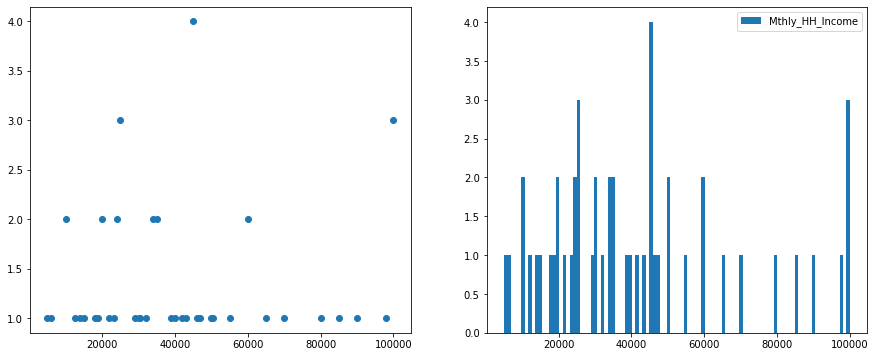

<Figure size 432x288 with 0 Axes>

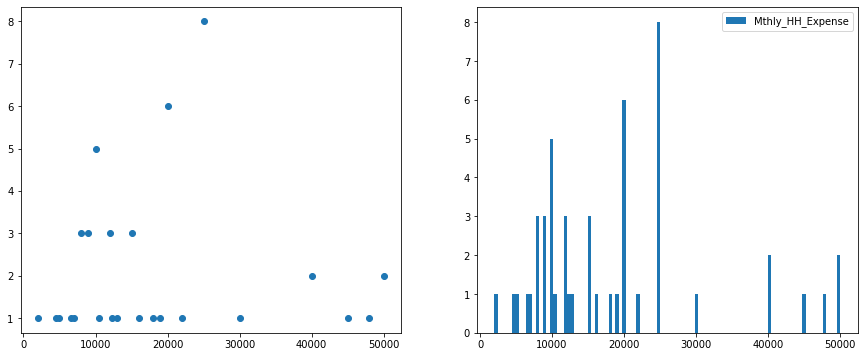

In [25]:
# ANSWER: BOTH COLOUMS ARE UNI-MODAL

import matplotlib.pyplot as plt

def custom_modeF(Arr):
  #find unique values
  unique, counts = np.unique(Arr, return_counts=True)
  d = dict(zip(unique, counts))
  d = np.array(sorted(d.items(), key=lambda x: x[1]))
  return d


for i in range(0, 2):
 key = df.keys()[i] 
 XY = custom_modeF(df[key])
 plt.figure(key+"1")
 fig,ax = plt.subplots(1,2)
 fig.set_size_inches((15,6))
 ax[0].scatter(XY[:,0],XY[:,1])

 ax[1].hist(df[key],100,label=key)
 ax[1].legend()
 print('')
 fig.show()
